# ダーツ投げのシミュレーションの作成

【問題1】ダーツのまとを選ぶ

In [2]:
import numpy as np

In [3]:
dice = [1, 2, 3, 4, 5, 6]
result = np.random.choice(dice)
print(result)

1


【問題2】ダーツを投げて、刺さった場所を記録する

In [4]:
mean = [result, 0]
cov = [[0.01, 0], [0, 0.01]]
x_y = np.random.multivariate_normal(mean, cov)
coordinates = [x_y[0], x_y[1]]
coordinates

[0.6160815054951023, 0.08607472265798242]

【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録す

In [5]:
from collections import defaultdict
hit_dict = defaultdict(list)
play_times = 1000

for _ in range(play_times):
    result = np.random.choice(dice)
    mean = [result, 0]
    cov = [[0.01, 0], [0, 0.01]]
    x_y = np.random.multivariate_normal(mean, cov)
    coordinates = [x_y[0], x_y[1]]
    hit_dict[result].append(coordinates)
    
print(hit_dict)

defaultdict(<class 'list'>, {4: [[4.053938035783997, -0.018883994501078725], [3.8142791727406946, 0.13471657616965116], [4.02461487006695, 0.174018294428115], [4.055933867547554, -0.106576616834689], [4.017803650925167, 0.0046702754966785045], [3.7417091511780223, 0.08711144553920744], [3.9783806591905377, -0.06647131885170232], [3.931995883059455, -0.003323145303857043], [3.88946321111925, -0.027311839420304036], [3.989602531507175, -0.006455951501770589], [4.0952346767773875, -0.0058716105400805005], [4.049961421412488, 0.10673083749046848], [4.080483044948593, -0.06243793884888778], [3.9951606523051546, 0.010690308305148735], [3.9524677721940993, 0.004486536147575624], [4.0675778273328556, -0.09456876068150223], [4.023878036503296, -0.0509003508444333], [4.097810543189959, 0.025565773438957714], [3.997374358921018, -0.05223727799651408], [3.992043141270335, -0.04804485291090717], [4.029428110889746, 0.09602016136392227], [3.735246350614937, 0.0318837217188726], [3.934802828125377, 0

【問題4】ダーツのまとと刺さった位置を描画する

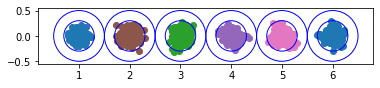

In [6]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import random
%matplotlib inline

fig, ax = plt.subplots()

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for key, list_value in hit_dict.items():
    outer_circle = patches.Circle(xy=(key, 0), radius=0.5, ec='b', fill=False)
    inner_circle = patches.Circle(xy=(key, 0), radius=0.3, ec='b', fill=False)
    ax.add_patch(outer_circle)
    ax.add_patch(inner_circle)

    color = random.choice(colors)
    for value in list_value:
        plt.scatter(value[0], value[1], c=color)

plt.axis('scaled')
ax.set_aspect(1)

【問題5】関数化

In [56]:
def play_dart(play_times=1000, target=6):
    hit_dict = defaultdict(list)
    
    for _ in range(play_times):
        result = np.random.randint(1,target+1)
        mean = [result, 0]
        cov = [[0.01, 0], [0, 0.01]]
        x_y = np.random.multivariate_normal(mean, cov)
        coordinates = [x_y[0], x_y[1]]
        hit_dict[result].append(coordinates)
        
    fig, ax = plt.subplots()

    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    for key, list_value in hit_dict.items():
        outer_circle = patches.Circle(xy=(key, 0), radius=0.5, ec='b', fill=False)
        inner_circle = patches.Circle(xy=(key, 0), radius=0.3, ec='b', fill=False)
        ax.add_patch(outer_circle)
        ax.add_patch(inner_circle)
    
        color = random.choice(colors)
        for value in list_value:
            plt.scatter(value[0], value[1], c=color)
    
    plt.axis('scaled')
    ax.set_aspect('equal')

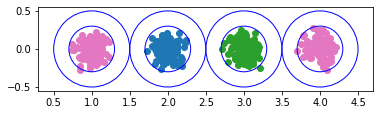

In [58]:
play_dart(play_times=500, target=4)